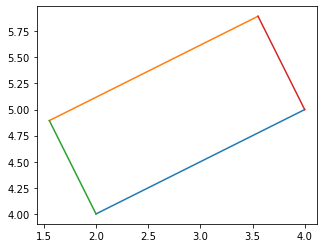

traget distance: 	 1 
length support a: 	 0.9999999999999998 
math dist a - res_a: 	 0.9999999999999999


In [7]:
%reload_ext autoreload
%autoreload 2
from utils import calc_parallel_c
from shapely import LineString
import math
import matplotlib.pyplot as plt

a = (2,4)
b = (4,5)
distance = 1

res_a, res_b = calc_parallel_c(a, b, distance)

base = LineString([a, b])
parallel = LineString([res_a, res_b])
support_a = LineString([res_a, a])
support_b = LineString([res_b, b])

x,y =base.xy
plt.plot(x,y)
x,y = parallel.xy
plt.plot(x,y)
x,y = support_a.xy
plt.plot(x,y)
x,y = support_b.xy
plt.plot(x,y)
plt.gca().set_aspect('equal','box')
plt.show()

print(f"traget distance: \t {distance} \nlength support a: \t {support_a.length} \nmath dist a - res_a: \t {math.dist(a,res_a)}")
assert(round(support_a.length,5) == round(math.dist(a,res_a), 5))



GPST to UTC offset 18.0
TAI from GPST 2021-10-04 09:31:05.000
UTC corrected from GPST 2021-10-04 09:30:10.000
done


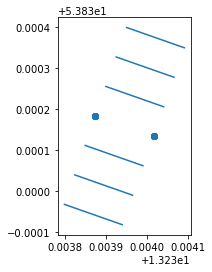

In [8]:
%reload_ext autoreload
%autoreload 2
from linestring_creator import main
from utils import read_interaction, read_ublox_pos

import geopandas as gpd


positions = read_ublox_pos("ublox_complete.pos")
interactions = read_interaction("interaction_test-data.txt")
file_name = "TEST_lanes.geosjon"

main(positions, interactions, file_name)


%matplotlib inline

#read in once
df_places = gpd.read_file(file_name)
test = df_places['geometry']
ax = test.plot()
ax.set_aspect("equal", "box")

